In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

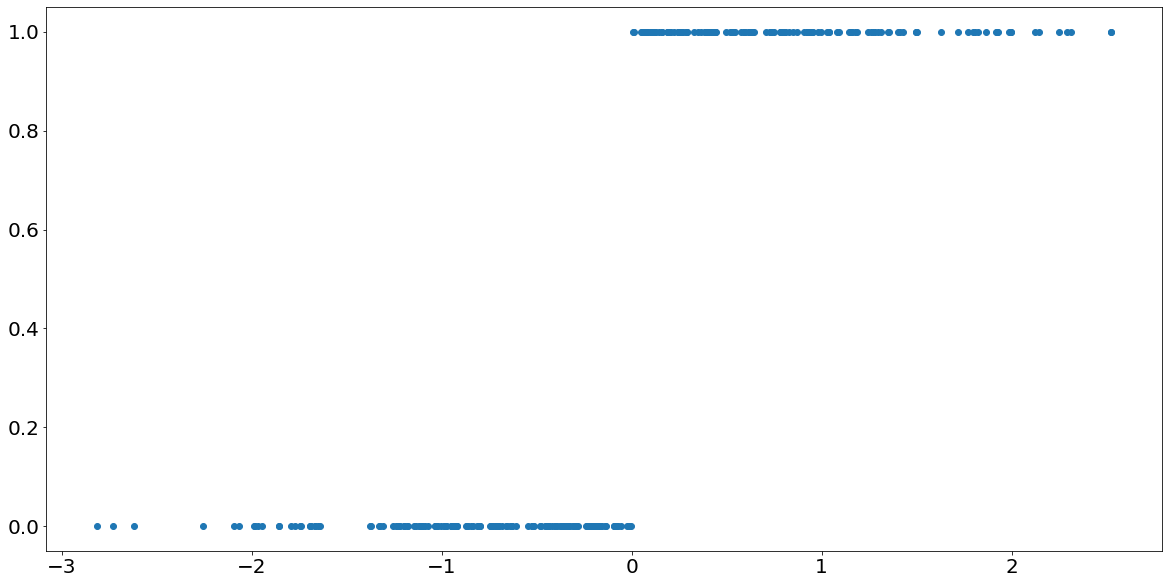

In [34]:
n_sample = 300

x_train = np.random.normal(0,1 , size = (n_sample, 1)).astype(np.float32)
y_train = (x_train >= 0).astype(np.float32)

x_min, x_max = x_train.min(), x_train.max()
x_test = np.linspace(x_min, x_max, 300).astype(np.float32).reshape(-1,1)
x_test_tf = tf.constant(x_test)


fig, ax = plt.subplots(figsize = (20,10))
ax.scatter(x_train, y_train)
ax.tick_params(labelsize = 20)

In [27]:
class classifier(tf.keras.Model):
    def __init__(self):
        super(classifier, self).__init__()
        
        self.d1 = tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
    
    def call(self, x):
        predictions = self.d1(x)
        return predictions
EPOCHS = 10
lr = 0.01

model = classifier()
loss_object = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.SGD(learning_rate = lr)

loss_metric = tf.keras.metrics.Mean()
acc_metric = tf.keras.metrics.CategoricalAccuracy()

for epoch in range(EPOCHS):
    for x, y in zip(x_train, y_train):
        x = tf.reshape(x, (1,1))
        with tf.GradientTape() as tape:
            predictions = model(x)
            predictions = tf.reshape(predictions, (1,))
            loss = loss_object(y, predictions)
        
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
        loss_metric(loss)
        acc_metric(y, predictions)
        
    print("Epochs: {}  Loss : {}  Acc : {}".format(epoch+1, loss_metric.result(), acc_metric.result()*100))
    
    loss_metric.reset_states()
    acc_metric.reset_states()


Epochs: 1  Loss : 0.9682072997093201  Acc : 100.0
Epochs: 2  Loss : 0.5121947526931763  Acc : 100.0
Epochs: 3  Loss : 0.37481459975242615  Acc : 100.0
Epochs: 4  Loss : 0.3127913773059845  Acc : 100.0
Epochs: 5  Loss : 0.27614787220954895  Acc : 100.0
Epochs: 6  Loss : 0.2513256072998047  Acc : 100.0
Epochs: 7  Loss : 0.23308520019054413  Acc : 100.0
Epochs: 8  Loss : 0.21894007921218872  Acc : 100.0
Epochs: 9  Loss : 0.20754358172416687  Acc : 100.0
Epochs: 10  Loss : 0.19809645414352417  Acc : 100.0


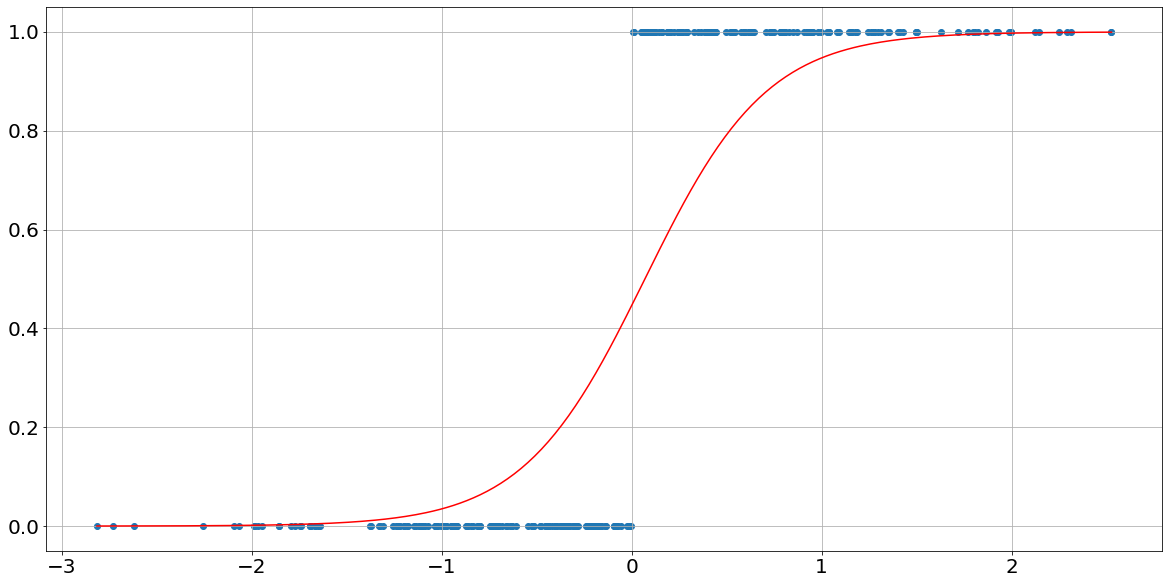

In [41]:
y_test_tf = model(x_test_tf)


x_result = x_test_tf.numpy()
y_result = y_test_tf.numpy()


fig, ax = plt.subplots(figsize = (20,10))
ax.plot(x_result, y_result, 'r')
ax.tick_params(labelsize = 20)
ax.scatter(x_train, y_train)
ax.tick_params(labelsize = 20)
ax.grid()
plt.show()
